<a href="https://colab.research.google.com/github/CWill22/NeuralHW3/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [33]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For reproducibility
np.random.seed(45)


Create example dataset

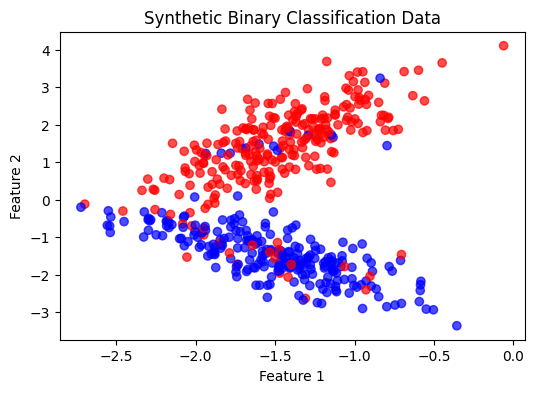

In [34]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=1.5)

# Visualize the dataset
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Synthetic Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


Define sigmoid activation function

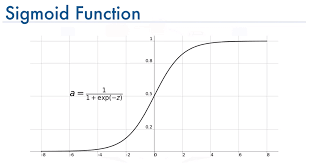

In [35]:
def sigmoid(z):
    """Compute the sigmoid function"""
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w):
    """Compute probability predictions for input X and weight vector w."""
    # Here, X is expected to include the bias term if needed.
    return sigmoid(np.dot(X, w))

def predict(X, w, threshold=0.5):
    """Return class predictions (0 or 1) based on the probability threshold."""
    return (predict_proba(X, w) >= threshold).astype(int)


Add bias term

In [36]:
def add_bias(X):
    """Add a bias term (a column of ones) to the dataset."""
    return np.hstack([np.ones((X.shape[0], 1)), X])

# Add bias term to both training and testing data
X_train_bias = add_bias(X_train)
X_test_bias = add_bias(X_test)


Implement Logistic Regression via Gradient Descent

In [37]:
def logistic_regression_GD(X, y, learning_rate=0.1, n_iterations=1000, verbose=False):
    """
    Train logistic regression using gradient descent.

    Parameters:
    - X: Input data (with bias term), shape (n_samples, n_features)
    - y: Binary labels (0 or 1), shape (n_samples,)
    - learning_rate: Learning rate (alpha)
    - n_iterations: Number of iterations for gradient descent
    - verbose: If True, print loss every 100 iterations

    Returns:
    - w: Trained weight vector, shape (n_features,)
    - losses: List of loss values recorded during training
    """
    m, n_features = X.shape
    # Initialize weights to small random values
    w = np.random.randn(n_features) * 0.01
    losses = []

    for i in range(n_iterations):
        # Compute linear combination
        z = np.dot(X, w)
        # Compute predictions
        y_hat = sigmoid(z)

        # Compute the gradient:
        # For each example, gradient = (y_hat - y) * x_i, summed over all examples.
        grad = np.dot(X.T, (y_hat - y)) / m

        # Update weights
        w = w - learning_rate * grad

        # Optionally, compute and store the loss
        if i % 10 == 0 or i == n_iterations - 1:
            # To avoid log(0), add a tiny epsilon
            epsilon = 1e-8
            loss = -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))
            losses.append(loss)
            if verbose:
                print(f"Iteration {i:4d}: Loss = {loss:.4f}")

    return w, losses

# Train the logistic regression model
w_trained, losses = logistic_regression_GD(X_train_bias, y_train, learning_rate=0.1, n_iterations=200, verbose=True)


Iteration    0: Loss = 0.6855
Iteration   10: Loss = 0.4501
Iteration   20: Loss = 0.3775
Iteration   30: Loss = 0.3460
Iteration   40: Loss = 0.3294
Iteration   50: Loss = 0.3197
Iteration   60: Loss = 0.3135
Iteration   70: Loss = 0.3094
Iteration   80: Loss = 0.3065
Iteration   90: Loss = 0.3045
Iteration  100: Loss = 0.3030
Iteration  110: Loss = 0.3019
Iteration  120: Loss = 0.3011
Iteration  130: Loss = 0.3005
Iteration  140: Loss = 0.3000
Iteration  150: Loss = 0.2996
Iteration  160: Loss = 0.2993
Iteration  170: Loss = 0.2991
Iteration  180: Loss = 0.2989
Iteration  190: Loss = 0.2988
Iteration  199: Loss = 0.2987


Plot loss fucntion over iterations

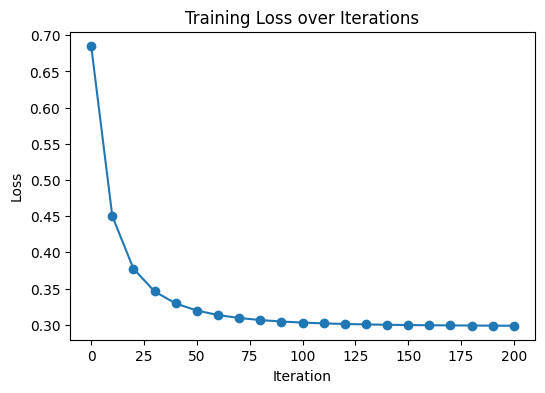

In [38]:
plt.figure(figsize=(6,4))
plt.plot(np.linspace(0, 200, len(losses)), losses, marker='o')
plt.title("Training Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


Evaluate models accuracy, which is how many points it classified correctly

In [39]:
# Make predictions on the test set
y_pred = predict(X_test_bias, w_trained)

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc*100:.2f}%")


Test Accuracy: 92.00%


Visualize decision boundary

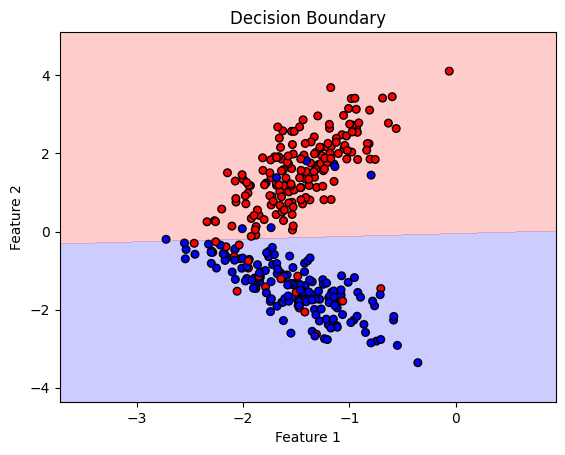

In [40]:
def plot_decision_boundary(X, y, w):
    # Create a grid of points to plot the decision boundary
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1  # Note: X[:, 0] is bias term
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Stack grid points and add bias
    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    probs = sigmoid(np.dot(grid, w)).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', edgecolor='k', s=30)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary using the training data (with bias added)
plot_decision_boundary(X_train_bias, y_train, w_trained)
